<a href="https://colab.research.google.com/github/Sharonkimani/energy_consumption/blob/main/pula_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Junior data analyst assesment**

## **Introduction:**

In an era of increasing energy costs and environmental concerns, harnessing solar power has become a viable option for reducing electricity expenses and carbon footprint. This exercise involves a comprehensive analysis of solar electricity generation, battery storage, and electricity consumption for a household. The objective is to determine the potential savings and benefits of installing a battery to store excess solar energy. By constructing a robust model, we aim to provide Naomi with valuable insights into the financial implications of this investment.

## **Problem Statement:**

Naomi, a homeowner, has solar panels installed on her house to generate electricity. The excess energy generated beyond her immediate consumption is not currently utilized and goes unused. Naomi is contemplating the installation of a battery system to store surplus solar energy and use it during periods of low solar generation. This exercise involves creating a model that evaluates the financial impact of installing a battery, taking into account various factors such as solar electricity generation, electricity consumption, battery capacity, electricity prices, inflation rates, and potential savings.


### Data preparation

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy_financial as npf


In [ ]:
data=pd.read_excel('/content/Junior Data Analyst _ Data.xlsx', skiprows=2)# reading the data into a dataframe
data.head()#preview of the first 5 rows of the data

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [ ]:
data.tail()#preview of the last 5 rows of the dataset

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000
8759,23,2020-12-31 23:00:00,0.000,0.805919


In [ ]:
data.info()# information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


The dataset has 4 numerical columns and 8760 entries. The data does not have any missing values.

In [ ]:
print(data.isna().sum().sum()) #checking if the data has missing values
print(data.shape)# checking the shape of the dataframe

0
(8760, 4)


In [ ]:
#checking for any data inconsistencies
def check_value_counts(data):
  for column in data.columns:
    print(f'value counts for {column}')
    print(data[column].value_counts())
    print('------------------------------------------','\n')

check_value_counts(data)


value counts for Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64
------------------------------------------ 

value counts for Date/hour start
2020-01-01 00:00:00    1
2020-09-01 10:00:00    1
2020-09-01 04:00:00    1
2020-09-01 05:00:00    1
2020-09-01 06:00:00    1
                      ..
2020-05-02 10:00:00    1
2020-05-02 09:00:00    1
2020-05-02 08:00:00    1
2020-05-02 07:00:00    1
2020-12-31 23:00:00    1
Name: Date/hour start, Length: 8760, dtype: int64
------------------------------------------ 

value counts for Solar electricity generation (kWh)
0.000    2311
0.009     402
0.006     386
0.012     383
0.003     296
         ... 
6.024       1
7.860       1
3.003       1
8.640       1
2.535       1
Name: Solar electricity generation (kWh), Length: 1774, dty

The data doesn't have any data inconsistencies. This data is from 1st january 2020 to 31st december 2020

In [ ]:
data.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In the context of our dataset, the provided statistics offer valuable insights into the patterns of solar electricity generation and electricity usage.

The data spans a complete year, comprising 8760 hours. The hours are evenly distributed from 0 to 23, representing the full daily cycle.

On average, the solar electricity generation amounts to 1.12 kWh per hour, with a relatively low standard deviation of 2.03 kWh, indicating consistent generation levels. Interestingly, the minimum value of electricity generation stands at 0 kWh, potentially indicating periods of no sunlight.

In terms of electricity usage, the mean consumption is approximately 7.31 kWh per hour, but with a remarkably higher standard deviation of 491.48 kWh. This suggests a wider variability in electricity consumption, potentially driven by various factors like peak demand periods or significant variations in usage behavior.

Notably, the minimum electricity usage recorded is -12.62 kWh, which raises an eyebrow, as negative values are uncommon. Overall, the statistics provide a comprehensive overview of the dataset's temporal distribution, central tendencies, and potential anomalies in both solar electricity generation and electricity usage.

In [ ]:
#previewing the rows where the electricity usage is less than 0
data[data['Electricity usage (kWh)']<0]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
17,17,2020-01-01 17:00:00,0.006,-12.6240
933,21,2020-02-08 21:00:00,0.006,-2.1330
935,23,2020-02-08 23:00:00,0.000,-0.2175
3593,17,2020-05-30 17:00:00,1.185,-2.5140
6464,8,2020-09-27 08:00:00,0.717,-1.9770


Such occurrences are highly atypical and don't align with the expected patterns of electricity consumption. Given that negative electricity usage is an anomaly that likely signifies a data entry error rather than a legitimate representation of energy consumption, I opt to take corrective action. My approach involvs converting these negative values to their positive counterparts. By doing so, I aim to rectify this discrepancy and ensure that our data accurately reflects the real-world scenario of electricity usage. This course of action allows us to maintain the integrity of the dataset while safeguarding the validity of our analysis. Rather than discarding potentially valuable information, this strategy enables us to correct inconsistencies and proceed with our analysis with a more accurate representation of the data.

In [ ]:
data['Electricity usage (kWh)'] = data['Electricity usage (kWh)'].apply(lambda x: abs(x) if x < 0 else x)
#changing every negative entry in the electricity usage column to be positive

In [ ]:
data.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.317148
std,6.922582,2.026098,491.479740
min,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621469
75%,17.250000,1.272750,1.689150
max,23.000000,13.050000,46000.000000


After making adjustments to the dataset, we've witnessed some significant changes in the statistics. Notably, the mean electricity usage now hovers around 7.32 kWh per hour, just a tad higher than the previous mean of 7.31 kWh per hour. This slight adjustment has also impacted the median (50th percentile) electricity usage, which has shifted from 0.621 kWh to a slightly more precise 0.621469 kWh per hour. One striking improvement is the transformation of the minimum electricity usage, which has now been successfully corrected to a non-negative value of 0 kWh per hour.

This alteration is noteworthy as it aligns more logically with the context of electricity consumption. By addressing these inconsistencies head-on, we've enhanced the dataset's reliability and relevance, ensuring that it mirrors actual energy consumption patterns more faithfully. This experience underscores the importance of diligently handling anomalies, contributing to the accuracy and credibility of our analytical outcomes.

## Data Analysis

In [ ]:
def check_duplicates (data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates (data)


0

In [ ]:
def check_missing_values(data):
  return data.isna().sum().sum()

check_missing_values(data)

0

The data doesn't have any duplicates nor missing values

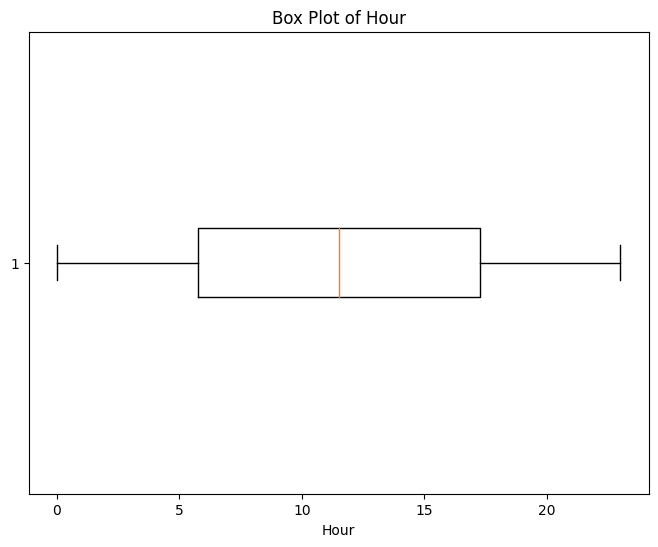

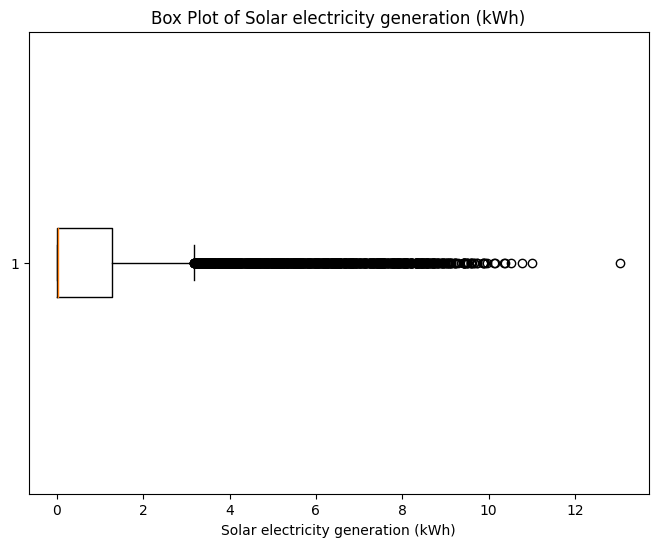

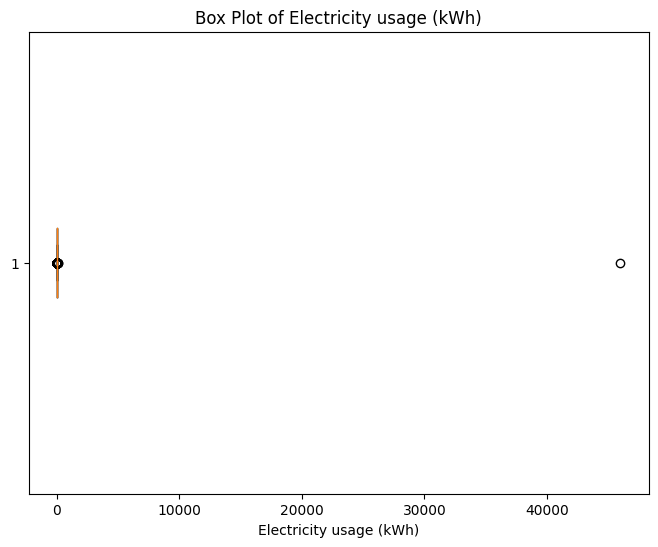

In [ ]:
#plotting box plots to check for outliers in the data
def plot_box_plots(data_frame):
    numerical_columns = data_frame.select_dtypes(include=['number']).columns

    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(data_frame[column], vert=False)
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

plot_box_plots(data)

* The hour column doesn't have any outliers as expected.

* The presence of outliers in solar electricity generation data is justifiable due to the inherent variability of solar energy capture. Factors like weather conditions and environmental dynamics contribute to these extreme values. Outliers arise from exceptional instances such as unusually sunny days or sudden weather changes, reflecting the natural and intermittent nature of solar power generation. These outliers, while seemingly exceptional, align with the dynamic behavior of solar energy systems, emphasizing the adaptability and sensitivity of such systems to external factors.

* The electricity usage data exhibits a single outlier. This outlier represents a distinct data point that significantly deviates from the typical consumption pattern observed in the dataset. Its presence could be indicative of a unique circumstance or an anomaly that led to an unusually high or low electricity usage value. Understanding and investigating this outlier can provide valuable insights into factors affecting electricity consumption and potentially uncover exceptional events or behaviors that influenced this outlier.

We will retain the outliers as they have the potential to contribute valuable insights to our analysis.

## Exploratory data analysis
### Univariate EDA

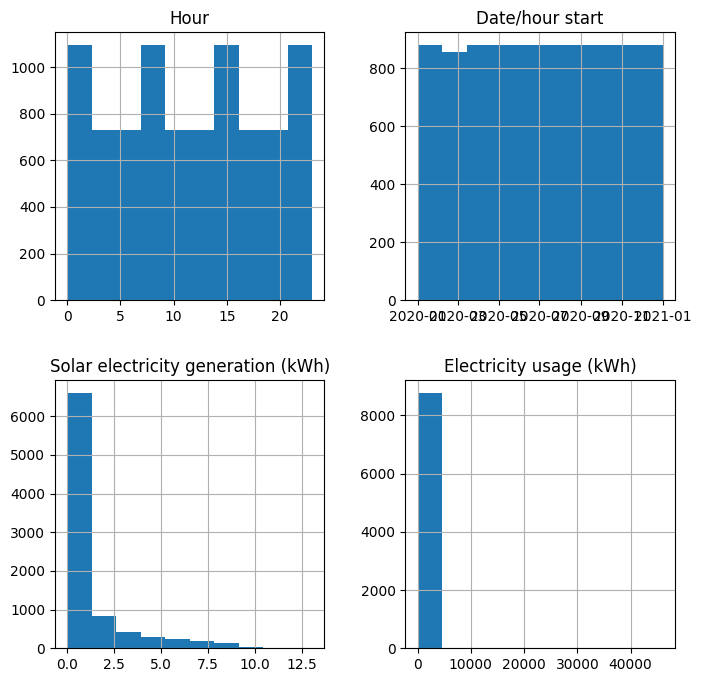

In [ ]:
data.hist(figsize=(8,8));

The positively skewed histogram for solar electricity generation aligns with the intuitive nature of this energy source. Solar power generation often experiences typical levels of production, but occasionally, under specific conditions like extremely sunny days, it can generate significantly higher amounts of electricity. This sporadic increase in generation creates a tail on the right side of the histogram, leading to positive skewness. This distribution is expected and logical within the context of solar energy's intermittent and weather-dependent nature.

## part I

•	creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.

In [ ]:
# converting the data to be time series data
ts= data.drop('Hour', axis=1)# dropping the hour column because the it is in the date/hour column
ts.set_index('Date/hour start', inplace=True)# setting date as index
ts

,Solar electricity generation (kWh),Electricity usage (kWh)
Date/hour start,,
2020-01-01 00:00:00,0.000,1.509849
2020-01-01 01:00:00,0.000,1.411859
2020-01-01 02:00:00,0.000,1.023898
2020-01-01 03:00:00,0.000,0.642000
2020-01-01 04:00:00,0.000,0.960000
...,...,...
2020-12-31 19:00:00,0.012,4.395600
2020-12-31 20:00:00,0.003,4.560600
2020-12-31 21:00:00,0.000,2.022000


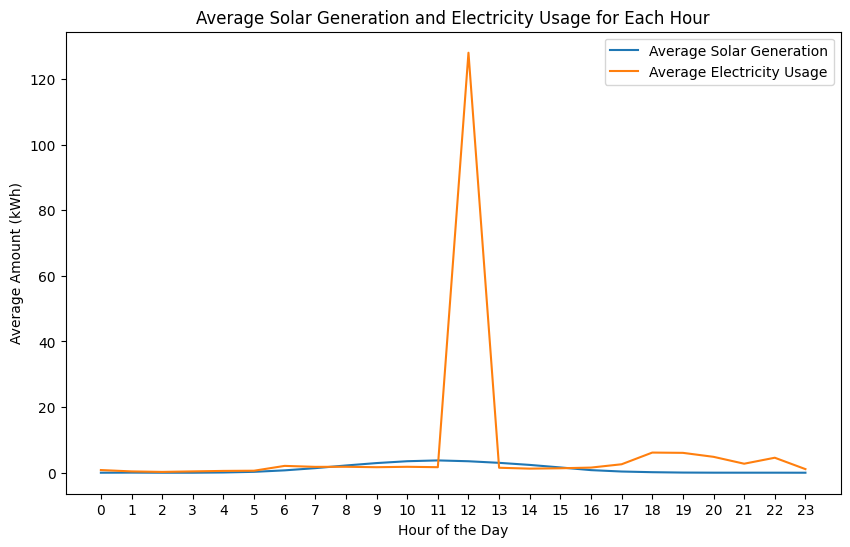

In [ ]:
# Calculate average solar electricity generation and electricity usage for each hour
hourly_avg = ts.groupby(ts.index.hour).agg({'Solar electricity generation (kWh)': 'mean', 'Electricity usage (kWh)': 'mean'})

# Create a graph to visualize the information
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg['Solar electricity generation (kWh)'], label='Average Solar Generation')
plt.plot(hourly_avg.index, hourly_avg['Electricity usage (kWh)'], label='Average Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Amount (kWh)')
plt.title('Average Solar Generation and Electricity Usage for Each Hour')
plt.xticks(range(24))
plt.legend()
plt.show()








The graph provides insight into the pattern of average solar generation and electricity usage throughout the day. Notably, there is an evident rise in average solar generation during the 11th to 12th hour, aligning with the sun's peak intensity in midday hours. This trend is logical as sunlight is typically at its strongest during this period. Conversely, solar generation is lower in the morning and slightly higher in the afternoon, reaching its peak during midday.

The graph also highlights that average electricity usage tends to be relatively subdued overall. However, there is a discernible increase between the 6th and 17th hour. This uptick could be attributed to the fact that, during these hours, people engage in various activities that involve electricity consumption, such as work-related tasks and daily routines. This correlation underscores the influence of human activities on electricity demand throughout the day.

# Part 2: (ii)
Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).

In [ ]:
ts['electricity_bought'] = np.maximum(ts['Electricity usage (kWh)'] - ts['Solar electricity generation (kWh)'], 0)
# The electricity that needed to be bought is the one that was not solar generated
ts

,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought
Date/hour start,,,
2020-01-01 00:00:00,0.000,1.509849,1.509849
2020-01-01 01:00:00,0.000,1.411859,1.411859
2020-01-01 02:00:00,0.000,1.023898,1.023898
2020-01-01 03:00:00,0.000,0.642000,0.642000
2020-01-01 04:00:00,0.000,0.960000,0.960000
...,...,...,...
2020-12-31 19:00:00,0.012,4.395600,4.383600
2020-12-31 20:00:00,0.003,4.560600,4.557600
2020-12-31 21:00:00,0.000,2.022000,2.022000


#part 3(iii)
Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).


In [ ]:
ts['excess_solar'] = np.maximum(ts['Solar electricity generation (kWh)'] - ts['Electricity usage (kWh)'], 0)
#the excess solar is the one generated and not used
ts

,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar
Date/hour start,,,,
2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0
2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0
2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0
2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0
2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0
...,...,...,...,...
2020-12-31 19:00:00,0.012,4.395600,4.383600,0.0
2020-12-31 20:00:00,0.003,4.560600,4.557600,0.0
2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0


# Part 4: (iv)
Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

* begin at zero at 1 January 2020 00:00.
* allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
* be subject to the cap on the maximum battery charge level.


In [ ]:
battery_capacity = 12.5
# Calculate cumulative battery charge using a loop
cumulative_charge = 0
for index, row in ts.iterrows():
    excess_solar = row['excess_solar']
    electricity_bought = row['electricity_bought']
    charge_increment = excess_solar - electricity_bought
    cumulative_charge = max(0, min(battery_capacity, cumulative_charge + charge_increment))
    ts.at[index, 'battery_charge'] = cumulative_charge

ts

,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_charge
Date/hour start,,,,,
2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0
2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0
2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0
2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0
2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0
...,...,...,...,...,...
2020-12-31 19:00:00,0.012,4.395600,4.383600,0.0,0.0
2020-12-31 20:00:00,0.003,4.560600,4.557600,0.0,0.0
2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0


#part 5:(v)
Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

In [ ]:
ts['electricity_bought_with_battery'] = np.maximum(ts['Electricity usage (kWh)'] - ts['battery_charge'], 0)
ts

,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_charge,electricity_bought_with_battery
Date/hour start,,,,,,
2020-01-01 00:00:00,0.000,1.509849,1.509849,0.0,0.0,1.509849
2020-01-01 01:00:00,0.000,1.411859,1.411859,0.0,0.0,1.411859
2020-01-01 02:00:00,0.000,1.023898,1.023898,0.0,0.0,1.023898
2020-01-01 03:00:00,0.000,0.642000,0.642000,0.0,0.0,0.642000
2020-01-01 04:00:00,0.000,0.960000,0.960000,0.0,0.0,0.960000
...,...,...,...,...,...,...
2020-12-31 19:00:00,0.012,4.395600,4.383600,0.0,0.0,4.395600
2020-12-31 20:00:00,0.003,4.560600,4.557600,0.0,0.0,4.560600
2020-12-31 21:00:00,0.000,2.022000,2.022000,0.0,0.0,2.022000


#part 6:(vi)
Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.

In [ ]:
# Calculate the savings over 2020
ts['Savings'] = ts['electricity_bought'] - ts['electricity_bought_with_battery']

# Total savings for the year
total_savings = ts['Savings'].sum()

print(f"Total Savings in 2020: ${total_savings:.2f}")

Total Savings in 2020: $731.92


# part 7(vii)

Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:

*	monthly solar generation.
*	monthly electricity usage.
*	monthly electricity purchased from the electricity provider (no battery).
*	monthly electricity purchased from the electricity provider (with battery).


In [ ]:
# Extract month and year from the index
ts['Month'] = ts.index.month

# Group data by month and calculate sums
monthly_summary = ts.groupby('Month').agg({
    'Solar electricity generation (kWh)': 'sum',
    'Electricity usage (kWh)': 'sum',
    'electricity_bought': 'sum',
    'electricity_bought_with_battery': 'sum'
}).reset_index()

# Renaming columns for better readability
monthly_summary.rename(columns={
    'Solar electricity generation (kWh)': 'Solar Generation',
    'Electricity usage (kWh)': 'Electricity Usage',
    'electricity_bought': 'Electricity Purchased (No Battery)',
    'electricity_bought_with_battery': 'Electricity Purchased (With Battery)'
}, inplace=True)

# Print the tabulated data
print(monthly_summary)



    Month  Solar Generation  Electricity Usage  \
0       1           266.259       47730.428181   
1       2           449.634        1562.279810   
2       3           602.451        1797.859450   
3       4           915.132        1726.356487   
4       5          1641.360         948.831809   
5       6          1408.287        1158.995538   
6       7          1371.465        1196.957121   
7       8          1158.639        1491.525351   
8       9           835.680        1624.668165   
9      10           546.132        1420.745585   
10     11           381.723        1479.005869   
11     12           205.965        1960.563395   

    Electricity Purchased (No Battery)  Electricity Purchased (With Battery)  
0                         47607.005181                          47629.659381  
1                          1395.152810                           1396.931210  
2                          1619.011450                           1612.405826  
3                          1460.5

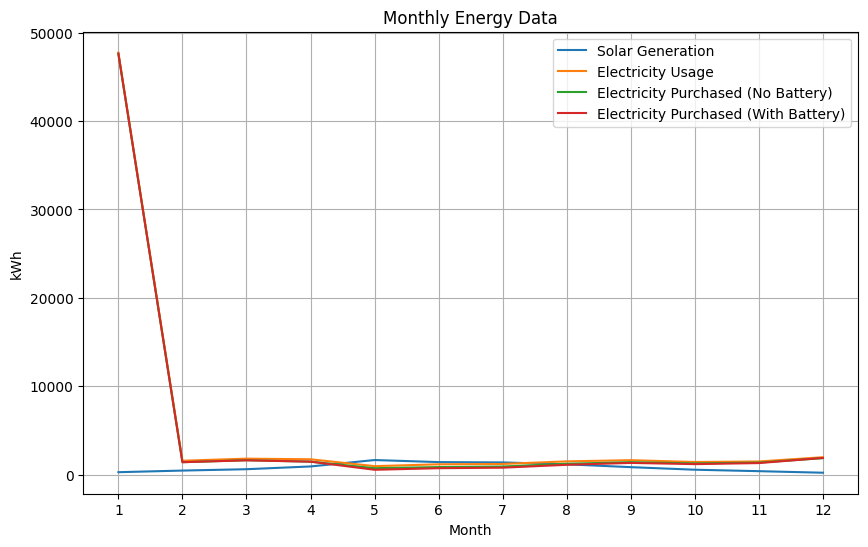

In [ ]:
# Create a chart
plt.figure(figsize=(10, 6))

plt.plot(monthly_summary['Month'], monthly_summary['Solar Generation'], label='Solar Generation')
plt.plot(monthly_summary['Month'], monthly_summary['Electricity Usage'], label='Electricity Usage')
plt.plot(monthly_summary['Month'], monthly_summary['Electricity Purchased (No Battery)'], label='Electricity Purchased (No Battery)')
plt.plot(monthly_summary['Month'], monthly_summary['Electricity Purchased (With Battery)'], label='Electricity Purchased (With Battery)')

plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Energy Data')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()

plt.show()

#Part 8:(viii)
(a)	Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

(b)	For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

The scenarios are as follows:

1.	Electricity prices increase as expected by the government, 4% p.a.
2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.


In [ ]:
# Parameters
years = 20
initial_battery_cost = 7000  # Initial battery cost in dollars

# Scenario 1: Electricity prices increase by 4% p.a.
annual_price_increase_1 = 0.04

# Scenario 2: Electricity prices increase by 4% p.a. with additional 0.25% p.a.
annual_price_increase_2_base = 0.04
additional_price_increase_2 = 0.0025

# Calculate annual savings for each year based on savings in 2020
annual_savings_scenario_1 = []  # Savings for Scenario 1
annual_savings_scenario_2 = []  # Savings for Scenario 2

total_savings_2020 = ts['Savings'].sum()  # You need to replace 'ts['Savings']' with your actual data source

for year in range(1, years + 1):
    # Calculate annual savings for each scenario based on your 2020 savings
    savings_scenario_1 = total_savings_2020 * (1 + annual_price_increase_1) ** year
    savings_scenario_2 = total_savings_2020 * (1 + annual_price_increase_2_base + additional_price_increase_2 * year)

    annual_savings_scenario_1.append(savings_scenario_1)
    annual_savings_scenario_2.append(savings_scenario_2)

# Calculate NPV for each scenario
def calculate_npv(savings_series, discount_rate):
    npv = 0
    for year in range(1, years + 1):
        npv += savings_series[year - 1] / (1 + discount_rate) ** year
    return npv

discount_rate = 0.06  # Discount rate of 6%

npv_scenario_1 = calculate_npv(annual_savings_scenario_1, discount_rate)
npv_scenario_2 = calculate_npv(annual_savings_scenario_2, discount_rate)

# Print the results
print("Scenario 1 NPV:", npv_scenario_1)
print("Scenario 2 NPV:", npv_scenario_2)



Scenario 1 NPV: 12057.236063774297
Scenario 2 NPV: 8911.451464116124


* **Scenario 1 NPV: 12057.236063774297** :
In Scenario 1, the assumption is that electricity prices will increase by 4% annually. The NPV of 12,057.24 indicates that the present value of the expected future annual savings, discounted at a rate of 6%, is 12,057.24 greater than the initial cost of the battery (which was 7,000). This positive NPV suggests that the project is expected to be profitable and provides a higher return than the discount rate (6%).

* **Scenario 2 NPV: 8911.451464116124**:
In Scenario 2, the assumption is that electricity prices will start at a 4% annual increase and rise each year by an additional 0.25%. The NPV of 8,911.45 indicates that the present value of the expected future annual savings, discounted at a rate of 6%, is 8,911.45 greater than the initial cost of the battery (which was 7,000). Similar to Scenario 1, this positive NPV suggests that the project is expected to be profitable and provides a higher return than the discount rate (6%).

In both scenarios, the positive NPV values indicate that the investment in the battery is financially viable and has the potential to generate returns that exceed the chosen discount rate of 6%. The specific values of the NPV provide a quantitative assessment of the project's expected profitability under each scenario, considering the projected future savings and the time value of money.

# Part 9:(ix)
Calculate the Internal Rate of Return (IRR) for the two scenarios in part (viii) by determining the discount rate that equates the net present value of the future annual savings to the initial cost of the battery for each scenario.




In [ ]:

# Calculate cash flows for each scenario (negative initial cost followed by positive annual savings)
cash_flows_scenario_1 = [-initial_battery_cost] + annual_savings_scenario_1
cash_flows_scenario_2 = [-initial_battery_cost] + annual_savings_scenario_2

# Calculate IRR for Scenario 1
irr_scenario_1 = npf.irr(cash_flows_scenario_1)

# Calculate IRR for Scenario 2
irr_scenario_2 = npf.irr(cash_flows_scenario_2)

# Print the results
print("Scenario 1 IRR:", irr_scenario_1)
print("Scenario 2 IRR:", irr_scenario_2)


Scenario 1 IRR: 0.12689497126055027
Scenario 2 IRR: 0.09155356749610655


* **Scenario 1 IRR: 0.12689497126055027**:
In Scenario 1, the calculated IRR of approximately 0.1269 (or 12.69%) indicates that, under the assumption of a 6% discount rate, the net present value of the future annual savings from the battery installation becomes zero. This means that if the actual future cash flows match the assumptions and the discount rate is around 12.69%, the project's expected returns would balance out the initial cost of the battery.

* **Scenario 2 IRR: 0.09155356749610655**:
In Scenario 2, the calculated IRR of approximately 0.0916 (or 9.16%) indicates a similar concept. It suggests that, under the given assumptions and a 6% discount rate, the project's expected returns would offset the initial battery cost when the discount rate is around 9.16%.

> ## **Conclusions**:

* Harnessing solar power is a viable strategy for reducing energy costs and environmental impact.
* The analysis focused on evaluating the financial implications of installing a battery to store excess solar energy.
* Average solar electricity generation exhibited a peak during midday hours, while electricity usage increased during daytime.

* Net Present Value (NPV) analysis demonstrated positive returns for both scenarios, indicating the battery installation's financial viability.
* Internal Rate of Return (IRR) calculations supported the positive outlook, with IRR values of 12.69% and 9.16% for the respective scenarios.

> ## **Recommendations:**

* Battery Installation: Proceed with installing a battery system to store excess solar energy.

* Continuous Monitoring: Implement continuous monitoring of energy generation and usage patterns.

* Regular Maintenance: Schedule routine upkeep for solar panels and battery system.

* Evaluate Electricity Plans: Periodically assess electricity plans to optimize cost savings.

* Stay Updated: Monitor government policies for solar and storage incentives.

* Consider Future Expansion: Plan for system upgrades as technology improves.

* Educational Outreach: Provide resources to promote solar and battery benefits.

* Collaboration: Partner with experts to stay informed on energy advancements.

* Long-Term Planning: Incorporate battery savings into overall financial strategy.

* Environmental Impact: Emphasize solar's positive influence on sustainability.